# Python Primer Part II Exercises (with Solutions)

## Lesson 5: Conditionals
---

### Exercise: convert temperatures between Celsius and Fahrenheit

Formula: `c = (f-32)*5/9`, where `c` is temperature in celsius and `f` is temperature in fahrenheit.

Expected Output : 

30°C is 86 in Fahrenheit

68°F is 20 in Celsius 

In [1]:
# get input from user
T = input("Input the temperature you like to convert (e.g. 68F, 30C etc.):")

# separate the input into value and unit, e.g. `45F` to `45` and `F`
T = T.strip()
in_value = float(T[:-1])
in_unit = T[-1].upper()

# convert between C and F
if in_unit == "C":
    out_value = in_value * 9 / 5.0 + 32
    out_unit = "Fahrenheit"
elif in_unit == "F":
    out_value = (in_value - 32) * 5 / 9.0
    out_unit = "Celsius"
else:
    raise ValueError("Unknown convention; expect input ending with `C` or `F`.")

# write output
print(f"The temperature {in_value:.1f}{in_unit} is {out_value:.1f} in {out_unit}.")

Input the temperature you like to convert (e.g. 68F, 30C etc.): 30C


The temperature 30.0C is 86.0 in Fahrenheit.


## Lesson 6: Dictionaries
---

### Exercise 1: count occurence of characters in a sentence

For example, given `hello hola`, the program returns a dictionary `{"h": 2, "e": 1, "l": 3, "o": 2, "a": 1}`

In [2]:
sentence = "hello hola"

count = {}
for n in sentence:

    # ignore white space
    if n == " ":
        continue

    # initialize the count to 1 when first see it
    if n not in count:
        count[n] = 1
    # increase count by 1
    else:
        count[n] = count[n] + 1

print(count)

{'h': 2, 'e': 1, 'l': 3, 'o': 2, 'a': 1}


Reminder: there are lots of useful Python libraries. 
To do the counting, wen can also use `collections.Counter` from standard library.

In [3]:
from collections import Counter

count = Counter(sentence)
print(dict(count))

{'h': 2, 'e': 1, 'l': 3, 'o': 2, ' ': 1, 'a': 1}


### Exercise 2: How heavy is a molecule?

You are given two things:

- a dictionary mapping elements' atomic symbols to the weights, i.e. 
    ```python
    atomic_weights = {
        "H": 1.00794,
        "He": 4.002602,
        ...
        "Lr": 262.0,
    }        
    ```

- another dictionary of the atomic symbols and the counts in a moleucle, e.g.
    ```python
    water = {"H": 2, "O": 1}
    caffine = {"C": 8, "H": 10, "N": 4, "O": 2}
    ```

Print that molecule's molecular weight.

In [4]:
import os
from monty.serialization import loadfn

# load symbol to weight dict from file
atomic_weights = loadfn(os.path.join("./data", "atomic_weights.json"))

# atomic weight is 18.01528
water = {"H": 2, "O": 1}

# atomic weight is 194.1906
caffine = {"C": 8, "H": 10, "N": 4, "O": 2}

# pick a molecule
molecule = water
# molecule = caffine

# calculate the molecular weight
weight = 0.0
for symbol, count in molecule.items():
    weight += count * atomic_weights[symbol]

print("Molecular weight is:", weight)

Molecular weight is: 18.01528


## Lesson 7: Functions
---

### Exercise 1: find first negative value

Write a function that takes a list of numbers as input and returns the first negative value in the list. What does the function do if the list is empty or there is no negative values?

In [5]:
from typing import List


def find_first_negative(values: List[float]):
    for v in values:
        if v < 0:
            return v


n = find_first_negative([2, -1, -4, 3])
print(n)

-1


### Exercise 2: convert temperatures 

Write a function to convert temperature between Celsius and Fahrenheit. 
Given the temperature value in one conversion, you function should return two values, the value and the other convension. 
For example,

`convert_temperature(30, "C") -> 86, "F"`

You may want to reuse some parts of the code in the exercise of Lesson 5.

In [6]:
def convert_temperature(value: float, unit: str = "C"):

    if unit.upper() == "C":
        out_value = value * 9 / 5.0 + 32
        out_unit = "F"
    elif unit.upper() == "F":
        out_value = (value - 32) * 5 / 9.0
        out_unit = "C"
    else:
        raise ValueError(f"Expect unit convertion to be `C` or `F`; got {unit}")

    return out_value, out_unit


v, u = convert_temperature(30, "C")
print(f"30C is {v}{u}")

v, u = convert_temperature(68, "F")
print(f"68F is {v}{u}")

30C is 86.0F
68F is 20.0C


## Lesson 8: Classes
---

### Exercise: convert temperatures (yes, again)

In exercise 2 of lesson 7, we put the temperature conversion between Celsius and Fahrenheit into a function. 
This improves the readbility and reusability of the code. 
Let's now convert it to a class to add more functionality, e.g. 

- convert to Kelvin (Kelvin = Celsius + 273.15) 
- increase/decrease the temperature
- ...

In this class, we store the temperature as Celsius in an attribute `self._celsius` and converts to others as needed.
You are asked to complete the `__init__()` and `increase()` function. 

As a side note, by convention, atrributes and methods with names starting with an underscore `_` are supposed to be used only within the class. 

In [7]:
class Temperature:
    def __init__(self, value: float, unit: str = "C"):

        self._unit = unit.upper()

        # convert all temperature to celsius
        if self._unit == "C":
            self._celsius = value
        elif self._unit == "F":
            self._celsius = (value - 32) * 5 / 9.0
        elif self._unit == "K":
            self._celsius = value - 273.15
        else:
            raise ValueError(
                f"Expect unit convertion to be `C`, `F` or `K`; got {unit}"
            )

        self._check()

    def increase(self, delta: float):

        if self._unit == "C":
            self._celsius += delta
        elif self._unit == "F":
            # 1 Fahrenheit degree = 5/9 Celsius degree
            self._celsius += delta * 5 / 9.0
        elif self._unit == "K":
            # 1 Kelvin degree = 1 Celsius degree
            self._celsius += delta
        else:
            raise Value("You will never get here.")

        self._check()

    def decrease(self, delta: float):
        self.increase(-1 * delta)

    @property
    def celsius(self):
        return self._celsius

    @property
    def fahrenheit(self):
        return self._celsius * 9 / 5.0 + 32

    @property
    def kelvin(self):
        return self._celsius + 273.15

    def _check(self):
        """
        Check the validicity of the values. You don't want to get a value below 0 K.
        """
        if self._celsius < -273.15:
            raise ValueError("Temperature below absolute zero!!!")

In [8]:
t = Temperature(273.15, "K")

print("Celsius", t.celsius)
print("Fahrenheit", t.fahrenheit)
print("Kelvin", t.kelvin)

Celsius 0.0
Fahrenheit 32.0
Kelvin 273.15


In [9]:
t.decrease(100)

print("Celsius", t.celsius)
print("Fahrenheit", t.fahrenheit)
print("Kelvin", t.kelvin)

Celsius -100.0
Fahrenheit -148.0
Kelvin 173.14999999999998


# Lesson 9: Test your Skills
---

## Now it's time to put your skills to the test!
* Exercise: As a materials investigator, your team has just finished running calculations for a large number of crystal structures. Now, you want to analyze the dataset by writing __functions__ that utilize logic (in the form of __conditionals__) to parse through the datasets in the forms of __dictionaries__ and __lists__.

First, load the relevant datasets

In [10]:
import os
from monty.serialization import loadfn

data_dir = "./data/"

# Our crystal structures, in addition to useful elemental information
crystals = loadfn(os.path.join(data_dir, "crystals.json"))
atomic_numbers = loadfn(os.path.join(data_dir, "atomic_numbers.json"))
atomic_weights = loadfn(os.path.join(data_dir, "atomic_weights.json"))

# Names of elements associated with an element symbol (e.g. {"Al": "Aluminium"})
element_names = loadfn(os.path.join(data_dir, "element_names.json"))

# Elemental mass fraction of Earth's crust (source: https://en.wikipedia.org/wiki/Abundances_of_the_elements_(data_page))
mass_frac_earth_crust = loadfn(os.path.join(data_dir, "mass_frac_earth_crust.json"))

# Dictionary of elements, with those who discovered them
# and the year they were discovered
# (sources: https://en.wikipedia.org/wiki/Timeline_of_chemical_element_discoveries,
#  https://education.jlab.org/qa/discover_ele.html)
discovery_dict = loadfn(os.path.join(data_dir, "discoveries.json"))

We have the mapping from `symbol` $\rightarrow$ `name`, now let's obtain `name` $\rightarrow$ `symbol` (we'll need it later)

In [11]:
print(element_names["Ag"])

element_symbols = {v: k for k, v in element_names.items()}

print(element_symbols["Silver"])

Silver
Ag


Next, we'll choose the set of elements that we would like to start with. Each element has a unique story associated with it. We can explore these stories with the information from the element discovery timeline.

__Our task:__ Build a function that takes a list of element symbols as input. In addition, if we want to add the elements associated with a particular materials discoverer, we can include some _regex_ (or "regular expression") strings corresponding to the discoverers we would like to feature.

In [12]:
from pymatgen.core import Element, Composition

In [13]:
def my_element_discoverer(
    elements: list = [], discoverers: list = [], prior_to: int = 2020
):

    # Start with elements provided by user
    # (use copy() to not modify list passed to function)
    all_elements = elements.copy()

    # Loop through discoverers to find which elements they discovered
    # and then add them to your list
    for discoverer in discoverers:
        for element_name in discovery_dict:

            for name in discovery_dict[element_name]["discovered_by"]:
                if discoverer in name:
                    elem = Element(element_symbols[element_name])
                    all_elements.append(elem)

    # Create a new list that will contain only the elements discovered
    # before the year you provide
    elements_pruned = []

    for elem in all_elements:
        element_name = element_names[str(elem)]
        if discovery_dict[element_name]["year"] != "?":
            year_discovered = int(discovery_dict[element_name]["year"])
        else:
            # Unknown discovery date (known since ancient times)
            year_discovered = -2000

        if year_discovered < prior_to:
            elem = Element(elem)
            elements_pruned.append(elem)

    all_elements = elements_pruned

    # Use set() to convert your list into a unique set
    # then recast as a list()
    all_elements = list(set(all_elements))

    return all_elements

Let's test out our function! Say we want to use oxygen in addition to elements discovered by scientists with Curie in their name (Marie and Pierre), as well as elements discovered by scientists in Berkeley

In [14]:
my_elements = my_element_discoverer(
    elements=["O"], discoverers=["Curie", "Lawrence Berkeley"], prior_to=2020
)
print(my_elements)

[Element O, Element Db, Element Ra, Element Po]


Can you spot which elements are missing?

(Hint below)

In [15]:
# Discovered by scientists at UC Berkeley
my_elements = my_element_discoverer(discoverers=["Ghiorso"], prior_to=2020)
print(my_elements)

[Element Cm, Element Bk, Element Cf, Element Es, Element Fm, Element Md, Element No, Element Lr, Element Rf, Element Sg, Element Am]


Platinum was found in gold alloys in present day Columbia dating as far back as 800 BC

In [16]:
my_elements = my_element_discoverer(
    elements=["Ni"], discoverers=["Indigenous People of South America"], prior_to=1800
)
print(my_elements)

[Element Ni, Element Pt]


Next, our goal is to find all of the crystals that contain the elements in our list. 

Once we obtain this list, it is often useful to sort these materials based on a particular metric, depending on which properties that we would like to assess. The two criteria we will use in this study are the molar mass and abundance:

* Molar mass = $\sum_{i=1}^N x_i n_i$, where $n_i$ is the elemental molar mass, and $x_i$ is the molar fraction
* Abundance metric = $\prod_{i=1}^N a_i^{y_i}$, where $a_i$ is the mass abundance of the element $i$, and $y_i$ is the mass fraction in the material

In [17]:
import numpy as np

In [18]:
def compute_molar_weight(crystal):
    # Obtain atomic fractions of material
    comp = Composition(crystal["pretty_formula"])
    atomic_fractions = [
        comp.get_atomic_fraction(Element(elem)) for elem in crystal["elements"]
    ]

    # Obtain atomic weights of elements in material
    weights = [atomic_weights[elem] for elem in crystal["elements"]]

    # Compute molar weight of material (weighted mean)
    molar_weight = 0.0
    for elem, frac, weight in zip(crystal["elements"], atomic_fractions, weights):
        molar_weight += frac * weight

    return molar_weight


def compute_abundance_metric(crystal):
    # Obtain mass fractions of material
    comp = Composition(crystal["pretty_formula"])
    molar_weight = compute_molar_weight(crystal)
    mass_fractions = [
        comp.get_atomic_fraction(Element(elem)) * (atomic_weights[elem] / molar_weight)
        for elem in crystal["elements"]
    ]

    # Obtain atomic abundances of elements in material
    abundances = [mass_frac_earth_crust[elem] for elem in crystal["elements"]]

    # Compute abundance metric (geometric mean)
    abundance_metric = 1.0
    for elem, frac, abundance in zip(crystal["elements"], mass_fractions, abundances):
        abundance_metric *= (100 * abundance) ** frac

    return abundance_metric

In [19]:
crystal = crystals[0]
print("Material:", crystal["pretty_formula"])
print(
    "Molar weight (g / mol / # atoms per formula unit) = ",
    compute_molar_weight(crystal),
)
print("Abundance metric (% kg/kg) = ", compute_abundance_metric(crystal))

Material: Ca3Ge3(MoO6)2
Molar weight (g / mol / # atoms per formula unit) =  36.10134
Abundance metric (% kg/kg) =  0.022347289066530374


Now that we have our sorting metrics, let's find the materials in our dataset that contain the elements we have provided, and sort them based on the criteria above.

A helpful relation: For finite sets $A$ and $B$, $B \subseteq A$ if and only if $B = A \cap B$

In [20]:
def get_crystals_from_elements(elements: list, crystals: list, sort_scheme: int = 0):

    crystals_matched = []
    for crystal in crystals:

        crystal_elems = [Element(elem) for elem in crystal["elements"]]

        # We can check if the material contains the elements that we have provided
        # (set B in A) by checking if B = intersection(A,B)
        intersection = set(elements) & set(crystal_elems)
        if set(elements) == intersection:
            crystals_matched.append(crystal)

    if sort_scheme == 0:
        # Sort by molar weight
        sort_key = "Molar weight (g / mol / # atoms per formula unit)"
        sortable_values = [
            compute_molar_weight(crystal) for crystal in crystals_matched
        ]
    elif sort_scheme == 1:
        # Sort by abundance metric
        sort_key = "Abundance metric (% kg/kg)"
        sortable_values = [
            compute_abundance_metric(crystal) for crystal in crystals_matched
        ]
    else:
        # Catch all case - no sorting provided
        sortable_values = []
        print("Warning: Invalid sort scheme!")
        return [], [], ""

    if sortable_values:
        # print(sortable_values)

        # Sort crystals based on sorting metric (reverse to descending order)
        value_map = [
            {"value": v, "crystal": c}
            for v, c in zip(sortable_values, crystals_matched)
        ]
        value_map = sorted(value_map, key=lambda x: x["value"], reverse=True)
        # sortable_values, crystals_matched = zip(*sorted(zip(sortable_values, crystals_matched), reverse=True))

        # Extract desired values after sorting
        sortable_values = [x["value"] for x in value_map]
        crystals_matched = [x["crystal"] for x in value_map]

        # print(sortable_values)

    return crystals_matched, sortable_values, sort_key

We've built our functions! Now let's test them to search the materials in our dataset

In [21]:
# The elements we would like to search our dataset
elements = [Element(elem) for elem in ["Ca", "O"]]

# Testing our function
crystals_matched, sorted_values, sort_key = get_crystals_from_elements(
    elements, crystals, sort_scheme=0
)

# The formulas of the crystals that we searched for
formulas = [crystal["pretty_formula"] for crystal in crystals_matched]

print("Number of crystals found: ", len(crystals_matched))
# print(formulas)

Number of crystals found:  445


For a large number of materials, we often gain the most information by perfoming an analysis of how the sorting criteria is distributed. In this case, we can create a histogram of the data using the `matplotlib` package. 

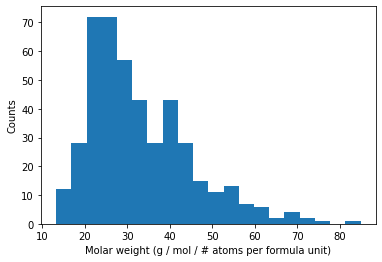

In [22]:
import matplotlib.pyplot as plt

number_of_bins = 20
plt.hist(sorted_values, number_of_bins)
plt.ylabel("Counts")
plt.xlabel(sort_key)
plt.show()